In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [139]:
df = pd.read_csv(r'/mnt/c/Users/mercg/Downloads/canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [140]:
features = ['area','price']
data = [
        [2600,550000],
        [3000, 565000],
        [3200, 610000],
        [3600, 680000],
        [4000, 725000]]
df1 = pd.DataFrame(data, columns=features)
df1

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- area
Feature names seen at fit time, yet now missing:
- year


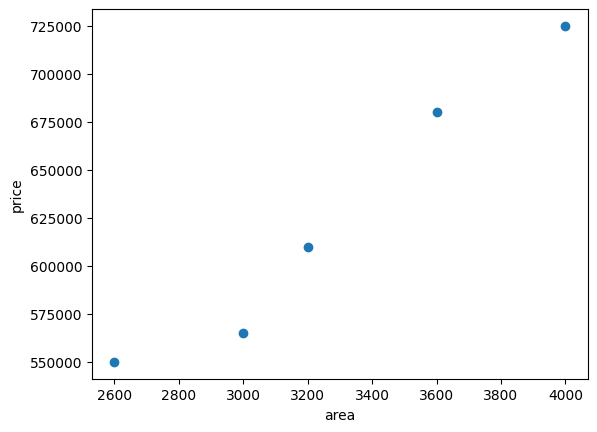

In [141]:
plt.scatter(df1.area, df1['price'])
plt.xlabel("area")
plt.ylabel("price")
plt.plot(df1.area, model.predict(df1[['area']]))
plt.show()

In [123]:
model = linear_model.LinearRegression()
model.fit(df1[['area']], df1[['price']])

LinearRegression()

In [124]:
model.predict([[3300]])

/home/mercg/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

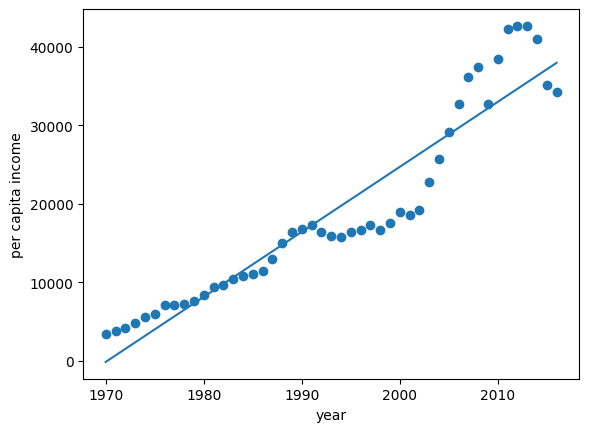

In [129]:
plt.scatter(df['year'], df['per capita income (US$)'])
plt.xlabel('year')
plt.ylabel('per capita income')
plt.plot(df.year, model.predict(df[['year']]))

In [127]:
model = linear_model.LinearRegression()
model.fit(df[['year']], df[['per capita income (US$)']])

LinearRegression()

In [128]:
model.predict([[2020]])

/home/mercg/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

In [142]:
df2 = pd.read_csv(r'/mnt/c/Users/mercg/Downloads/homeprices.csv')
df2.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [154]:
df2['bedrooms'] = df2['bedrooms'].fillna(df2['bedrooms'].median())

In [155]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [163]:
model = linear_model.LinearRegression()
model.fit(df2[['area', 'bedrooms', 'age']], df2[['price']])
model.predict([[3000, 3, 15]])

/home/mercg/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[579201.19929613]])

In [2]:
df3 = pd.read_csv(r'/mnt/c/Users/mercg/Downloads/hiring.csv')
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df3['experience'] = df3['experience'].fillna("zero")
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
from word2number import w2n
df3['experience'] = df3['experience'].apply(w2n.word_to_num)
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [6]:
df3['test_score(out of 10)'] = df3['test_score(out of 10)'].fillna(df3['test_score(out of 10)'].median())
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [7]:
model = linear_model.LinearRegression()
model.fit(df3[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df3[['salary($)']])
model.predict([[12,10,10]])

/home/mercg/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92002.18340611]])

In [11]:
import pickle

In [12]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)